In [2]:
import pandas as pd
import numpy as np

# Data
from folktables import ACSDataSource, ACSIncome

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2
from main.utils.dataloader import load_sunbelt_data

In [3]:
data_source = ACSDataSource(survey_year='2018',
                        horizon='1-Year',
                        survey='person')
                        
data_sunbelt = data_source.get_data(states=['TX', 'FL', 'GA', 'NC'],
                              download=True)

features_income, _, _ = ACSIncome.df_to_pandas(data_sunbelt)
all_variables = set(list(features_income.columns) + ['PINCP'])
want_data = data_sunbelt.loc[:, list(all_variables)].dropna()

repl_dict = { 1: 'white',
              2: 'black',
              3: 'native_american',
              4: 'native_alaskan',
              5: 'native_both',
              6:  'asian',
              7: 'pacific_islander',
              8: 'other',
              9: 'mixed'}

want_data.RAC1P = want_data.RAC1P.map(repl_dict)

# Filter according to doc
want_data = want_data.loc[want_data.AGEP >= 18,: ]
want_data = want_data.loc[want_data.WKHP >= 1,: ]
want_data = want_data.loc[want_data.PINCP >= 100,: ]

Text(0.5, 1.0, 'Sex difference overall')

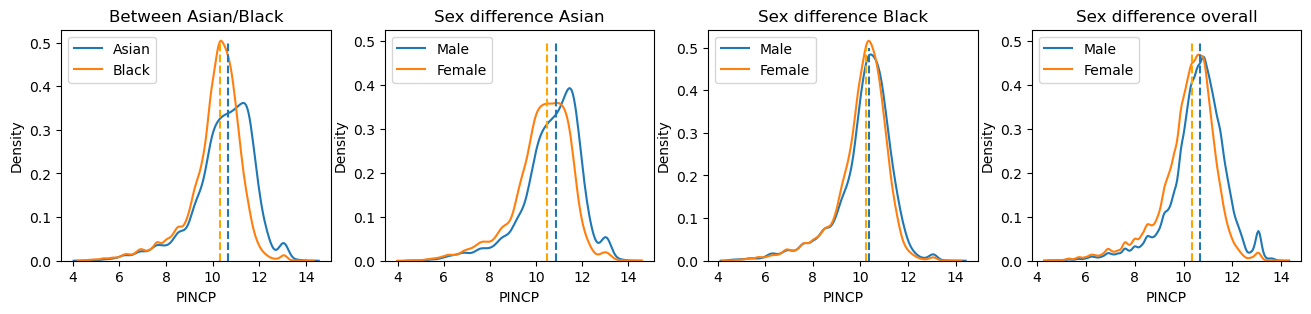

In [5]:
fig, ax = plt.subplots(1,4, figsize=(16,3))

sns.kdeplot(np.log(want_data.PINCP[want_data.RAC1P == 'asian']), 
            label='Asian', 
            ax=ax[0])
sns.kdeplot(np.log(want_data.PINCP[want_data.RAC1P == 'black']), 
            label='Black', 
            ax=ax[0])
ax[0].vlines(x=np.log(want_data.PINCP[want_data.RAC1P == 'asian'].median()), 
           ymin=0, ymax=0.5, linestyles='dashed', )
ax[0].vlines(x=np.log(want_data.PINCP[want_data.RAC1P == 'black'].median()), 
           ymin=0, ymax=0.5, linestyles='dashed', 
           colors='orange')

ax[0].legend(loc='upper left')
ax[0].set_title('Between Asian/Black')

# Second 
sns.kdeplot(np.log(want_data.PINCP[(want_data.RAC1P == 'asian') & (want_data.SEX == 1)]), 
            label='Male', 
            ax=ax[1])
sns.kdeplot(np.log(want_data.PINCP[(want_data.RAC1P == 'asian') & (want_data.SEX == 2)]), 
            label='Female', 
            ax=ax[1])
ax[1].vlines(x=np.log(want_data.PINCP[(want_data.RAC1P == 'asian') & (want_data.SEX == 1)].median()), 
           ymin=0, ymax=0.5, linestyles='dashed')
ax[1].vlines(x=np.log(want_data.PINCP[(want_data.RAC1P == 'asian') & (want_data.SEX == 2)].median()), 
           ymin=0, ymax=0.5, linestyles='dashed', 
           colors='orange')

ax[1].legend(loc='upper left')
ax[1].set_title('Sex difference Asian')

sns.kdeplot(np.log(want_data.PINCP[(want_data.RAC1P == 'black') & (want_data.SEX == 1)]), 
            label='Male', 
            ax=ax[2])
sns.kdeplot(np.log(want_data.PINCP[(want_data.RAC1P == 'black') & (want_data.SEX == 2)]), 
            label='Female', 
            ax=ax[2])
ax[2].vlines(x=np.log(want_data.PINCP[(want_data.RAC1P == 'black') & (want_data.SEX == 1)].median()), 
           ymin=0, ymax=0.5, linestyles='dashed')
ax[2].vlines(x=np.log(want_data.PINCP[(want_data.RAC1P == 'black') & (want_data.SEX == 2)].median()), 
           ymin=0, ymax=0.5, linestyles='dashed', 
           colors='orange')

ax[2].legend(loc='upper left')
ax[2].set_title('Sex difference Black')

sns.kdeplot(np.log(want_data.PINCP[(want_data.SEX == 1)]), 
            label='Male', 
            ax=ax[3])
sns.kdeplot(np.log(want_data.PINCP[(want_data.SEX == 2)]), 
            label='Female', 
            ax=ax[3])
ax[3].vlines(x=np.log(want_data.PINCP[ (want_data.SEX == 1)].median()), 
           ymin=0, ymax=0.5, linestyles='dashed')
ax[3].vlines(x=np.log(want_data.PINCP[(want_data.SEX == 2)].median()), 
           ymin=0, ymax=0.5, linestyles='dashed', 
           colors='orange')

ax[3].legend(loc='upper left')
ax[3].set_title('Sex difference overall')